### imports

In [1]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

### standardise data format & split train-test if needed

This parts shows how to take the raw datasets and transform them to a standard require format, namely only 2 columns with given names, same label format etc. You can use these examples (as well as extra datasets here) to learn how to prepare any new datasets.

#### IMDB dataset

In [125]:
train = 'train'  # run for 'train' and then 
out_path = 'aclImdb/'
path = 'aclImdb/' + train + "/"

positive

In [126]:
cur_path = path+'pos'
directory = os.fsencode(cur_path)

txt_lst = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith(".txt"): 
        print(filename + ' - not .txt')
        continue
    else:
        with open(os.path.join(cur_path, filename), 'r', encoding='utf-8') as f:
            txt_lst.append(f.read().replace('\n', ''))

In [127]:
pos = pd.DataFrame(txt_lst, columns=['content'])
pos['label'] = np.ones((len(pos), 1)) 

In [128]:
pos.shape

(12500, 2)

In [129]:
lens = pos.content.apply(lambda x: len(x.split()))

In [130]:
sum(lens < 200)

7218

In [131]:
pos = pos[lens < 200]

negative

In [132]:
cur_path = path+'neg'
directory = os.fsencode(cur_path)

txt_lst = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith(".txt"): 
        print(filename + ' - not .txt')
        continue
    else:
        with open(os.path.join(cur_path, filename), 'r', encoding='utf-8') as f:
            txt_lst.append(f.read().replace('\n', ''))

In [133]:
neg = pd.DataFrame(txt_lst, columns=['content'])
neg['label'] = np.zeros((len(neg), 1)) 

In [134]:
lens = neg.content.apply(lambda x: len(x.split()))

In [135]:
sum(lens < 200)

7362

In [136]:
neg = neg[lens < 200]

In [137]:
df = pd.concat([pos,neg])

In [138]:
df['label'] = df.label.astype(int)
df.head()

,content,label
0,"Yes it was a little low budget, but this movie...",1
1,I really liked this movie I saw the original c...,1
2,"I appreciated the photography, the textures, t...",1
8,"...intimate and specific. Yes, a bit of a cind...",1
13,"A classic cartoon, always enjoyable and funny....",1


In [139]:
df.to_csv(out_path + 'imdb_' + train + '.csv', index=False)

#### click-bait

In [31]:
df_data = pd.read_json('clickbait/instances.jsonl', lines=True)
df_target = pd.read_json('clickbait/truth.jsonl', lines=True)

In [32]:
len(df_data)

19538

In [35]:
# mrege both dataframes
df = df_data.merge(df_target, on='id')

In [36]:
df.head()

,id,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle,truthClass,truthJudgments,truthMean,truthMedian,truthMode
0,858462320779026432,[],[UK’s response to modern slavery leaving victi...,Sat Apr 29 23:25:41 +0000 2017,[modern-slavery-rex.jpg],“Inexcusable” failures in the UK’s system for ...,"modern slavery, Department For Work And Pensio...",[Thousands of modern slavery victims have not ...,‘Inexcusable’ failures in UK’s response to mod...,no-clickbait,"[0.33333333330000003, 0.0, 0.33333333330000003...",0.133333,0.000000,0.000000
1,858421020331560960,[],[this is good],Sat Apr 29 20:41:34 +0000 2017,"[In this July 1, 2010 file photo, Dr. Charmain...",President Donald Trump has appointed pro-life ...,"Americans United for Life, Dr. Charmaine Yoest...",[President Donald Trump has appointed the pro-...,Donald Trump Appoints Pro-Life Advocate as Ass...,clickbait,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,1.000000,1.000000
2,858368123753435136,[],"[The ""forgotten"" Trump roast: Relive his bruta...",Sat Apr 29 17:11:23 +0000 2017,[President Trump will not attend this year's W...,President Trump won't be at this year's White ...,"trump whcd, whcd, white house correspondents d...",[When the White House correspondents’ dinner i...,The ‘forgotten’ Trump roast: Relive his brutal...,no-clickbait,"[0.33333333330000003, 1.0, 0.33333333330000003...",0.466667,0.333333,0.333333
3,858323428260139008,[],[Meet the happiest #dog in the world!],Sat Apr 29 14:13:46 +0000 2017,"[Maru , Maru, Maru, Maru, Maru]","The article is about Maru, a husky dog who has...","Maru, husky, dogs, pandas, furball, instagram",[Adorable is probably an understatement. This ...,"Meet The Happiest Dog In The World, Maru The H...",clickbait,"[1.0, 0.6666666666000001, 1.0, 1.0, 1.0]",0.933333,1.000000,1.000000
4,858283602626347008,[],[Tokyo's subway is shut down amid fears over a...,Sat Apr 29 11:35:31 +0000 2017,[All nine lines of Tokyo's subway system were ...,"The temporary suspension, which lasted ten min...","Tokyo,subway,shut,fears,North,Korean,attack",[One of Tokyo's major subways systems says it ...,Tokyo's subway is shut down amid fears over an...,no-clickbait,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000,0.000000


In [37]:
filtered_df = df[['postText','truthClass']]  # take only wanted columns
filtered_df.truthClass = (filtered_df.truthClass == 'clickbait')  # binarise classes
filtered_df.columns = ['content', 'label']  # change column names
filtered_df.label = filtered_df.label.astype(int)  # make zero 1 for similarity to the others
filtered_df.content = filtered_df.content.apply(lambda x: x[0])  # take string and not list

/storage/conda_envs/thesis/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
filtered_df.head()

,content,label
0,UK’s response to modern slavery leaving victim...,0
1,this is good,1
2,"The ""forgotten"" Trump roast: Relive his brutal...",0
3,Meet the happiest #dog in the world!,1
4,Tokyo's subway is shut down amid fears over an...,0


In [39]:
# train test split
df_click_train, df_click_test = train_test_split(filtered_df, test_size=0.2, random_state=7)

In [40]:
# save files
df_click_train.to_csv('clickbait/clickbait_train.csv', index=False)
df_click_test.to_csv('clickbait/clickbait_test.csv', index=False)

#### spam

In [2]:
df = pd.read_csv('spam/SPAM text message 20170820 - Data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.Category = (df.Category == 'spam').astype(int)
df.columns = ['label', 'content']
df = df[['content', 'label']]

train test split

In [11]:
df_spam_train, df_spam_test = train_test_split(df, test_size=0.2, random_state=7)

save files

In [12]:
df_spam_train.to_csv('spam/spam_train.csv', index=False)
df_spam_test.to_csv('spam/spam_test.csv', index=False)

#### toxic

In [2]:
df_train = pd.read_csv('toxic/train.csv')
df_test = pd.read_csv('toxic/test.csv')
test_labels = pd.read_csv('toxic/test_labels.csv')

In [13]:
# add wanted labels from class
df_test["toxic"] = test_labels.toxic

In [14]:
# filter only labelled test data
df_test = df_test[df_test.toxic != -1]

In [16]:
df_test.head()

,id,comment_text,toxic
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0
7,000247e83dcc1211,:Dear god this site is horrible.,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0


In [18]:
# take only wanted columns and change their names
df_train_toxic = df_train[["comment_text", "toxic"]]
df_train_toxic.columns = ['content', 'label']

df_test_toxic = df_test[["comment_text", "toxic"]]
df_test_toxic.columns = ['content', 'label']

In [20]:
# save
df_train_toxic.to_csv('toxic/toxic_train.csv', index=False)
df_test_toxic.to_csv('toxic/toxic_test.csv', index=False)

#### pubmed

In [106]:
path = 'pubmed/'

In [108]:
orig_df = pd.read_csv(path + 'pubmed_review_case.csv')

In [109]:
df = orig_df[['article_abstract', 'is_review']]
df.columns = ['content', 'label']
df.label = df.label.astype(int)

/home/gallilm/.conda/envs/gallilm2/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
lens = df.content.apply(lambda x: len(x.split()))

In [111]:
(lens < 180).sum()

2480153

In [112]:
# filter lengths
print(len(df))
df_filter = df[df.content.apply(lambda x: len(x.split())) < 180]
print(len(df_filter))

3203404
2480153


In [113]:
df_filter.head()

,content,label
0,"In this review, we analyze data pertinent to t...",1
1,A new method of eliminating the exocrine funct...,0
2,The left ear of a 57-year-old female who suffe...,0
3,Takayasu's disease is a nonspecific arteritis ...,0
4,Lipids and sphingomyelinase activity were stud...,0


In [114]:
# train-test split
df_filter = df_filter.sample(frac=1., random_state=42)

In [115]:
df_filter.iloc[:int(0.5*len(df_filter))].to_csv(path+'/pubmed_train.csv', index=False)
df_filter.iloc[int(0.5*len(df_filter)):].to_csv(path+'/pubmed_test.csv', index=False)

### MNLI

In [6]:
base_path = '../../multinli_1.0/multinli_1.0_'
data_paths = [f'{base_path}{f}.txt' for f in ['train', 'dev_matched', 'dev_mismatched']]
out_path = 'mnli/mnli_'
test_size = 20000

In [3]:
dfs = []
for data_path in data_paths:
    # ugly dataframe parsing because of quote errors using regular read method 
    with open(data_path, 'r') as f:
        data = [l.split('\t') for l in f.readlines()]
        df = pd.DataFrame(data[1:], columns=data[0])

    df = df[['sentence1', 'sentence2', 'gold_label']]
    df.columns = ['content', 'content2', 'label']
    dfs.append(df)
    
total_df = pd.concat(dfs)
total_df.reset_index(drop=True, inplace=True)

In [4]:
total_df = total_df[total_df.label != '-']  # remove undecisive labels
total_df.label = total_df.label.replace({"entailment": 0, "neutral": 1, "contradiction": 2})  # map labels to numbers

In [7]:
i = 18839
total_df.iloc[i].content, total_df.iloc[i].content2, total_df.iloc[i].label

('They were all very disturbed.', "It didn't disturb them at all.", 2)

In [8]:
total_df.iloc[:-test_size]

,content,content2,label
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0
3,How do you know? All this is their information...,This information belongs to them.,0
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,1
...,...,...,...
392344,The volcano's name is thought to derive from a...,The volcano was given its name two hundred yea...,1
392345,The soaring vaults of the sober interior have ...,German Gothic design is know for its soaring v...,0
392346,you know since the women's movement in the wel...,The women's movement solved everything and we ...,2
392347,The increase in one asset is offset by an equa...,.When an asset increases it means there is no ...,2


In [9]:
total_df.iloc[-test_size:]

,content,content2,label
392349,i would i would love to go there i mean like a...,I think I would hate traveling there because i...,2
392350,oh Teenage Mutant Ninja Turtles huh um-hum,The Teenage Mutant Ninja Turtles reboot.,1
392351,"In 1793, when the leaders of the Revolution de...",The leaders of the Revolution declared the pal...,0
392352,She didn't wait long to come here.,She had to wait for three days.,2
392353,These conferences will enable program staff to...,These conferences enable program staff to exam...,1
...,...,...,...
412697,Do you watch that?,Can you see?,2
412698,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l...",2
412699,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.,2
412700,That's a good attitude!,"You feel good about this, don't you?",1


In [10]:
total_df.iloc[:-test_size].to_csv(out_path + 'train.csv', index=False)
total_df.iloc[-test_size:].to_csv(out_path + 'test.csv', index=False)

### pre process the strings

This part shows how to pre-proccess the strings by removing special charceters, standarising spacing, making lowercase and such. Run this on all datasets you wish to use (train and test)!

In [51]:
base_path = 'toxic/toxic'
dataset = 'test'  # run also on 'train' and also on 'test'
in_path = base_path + '_' + dataset + '.csv'
out_path = base_path + '_' + dataset + '_clean.csv'

In [52]:
df = pd.read_csv(in_path)

#### drop nans

In [54]:
df = df.dropna()

#### filter html markings & replace special utf-8 characters

In [55]:
def replace_special_chars(s):
    map_dict = {'’':"'", '…':'...', "–":'-', '“':'"', '—':'-', "‘":"'", '”':'"', "&amp;":"&", "&gt;":'', '&lt;':'', '\n':' ', '<br /><br />':' '}
    for key in map_dict:
        s = s.replace(key, map_dict[key])
    return s

In [56]:
df['content'] = df.content.apply(replace_special_chars)
if 'content2' in df.columns:
    df['content2'] = df.content2.apply(replace_special_chars)

#### add white space around punctuation

In [57]:
def space_punctuation(s):
    s = re.sub(r'([0-9a-zA-Z])(\')([a-zA-Z])', r'\1____\3', s)  # save midword apostrephes
    s = re.sub(r'([a-zA-Z])(\.)([a-zA-Z])', r'\1~~~~\3', s)  # save midword .
    # space around punctuation
    s = re.sub(r'([a-zA-Z])([.,!?#*()/\[\];:"“”\-\'])', r'\1 \2', s)
    s = re.sub(r'([.,!?#*()/\[\];:"“”\-\'])([a-zA-Z])', r'\1 \2', s)

    s = re.sub(r'____', "'", s)  # return apostrhephes
    s = re.sub(r'~~~~', ".", s)  # return .

    return s

In [58]:
df.content = df.content.apply(space_punctuation)
if 'content2' in df.columns:
    df.content2 = df.content2.apply(space_punctuation)

In [59]:
# special case to surround "="+ with spaces even if it is joined to text
df.content = df.content.apply(lambda x: re.sub(r'(=)+', ' \\1 ', x))
if 'content2' in df.columns:
    df.content2 = df.content2.apply(lambda x: re.sub(r'(=)+', ' \\1 ', x))

#### make text lower case

In [60]:
df.content = df.content.apply(lambda x: x.lower())
if 'content2' in df.columns:
    df.content2 = df.content2.apply(lambda x: x.lower())

#### remove extra white spaces

In [61]:
df.content = df.content.apply(lambda x: ' '.join(x.split()))
if 'content2' in df.columns:
    df.content2 = df.content2.apply(lambda x: ' '.join(x.split()))

#### filter extremely long sentences

In [62]:
# if not done, one can get indexing errors when training BERT model
lens = df.content.apply(lambda x: len(x.split()))
df = df[(lens<250)]
if 'content2' in df.columns:
    lens = df.content2.apply(lambda x: len(x.split()))
    df = df[(lens<250)]

#### remove empty strings

In [63]:
df = df[~(df.content.eq(''))]

#### save csv

In [64]:
df.sample().iloc[0].content

'fowler is such a hypocrite . he opposes having anything about foreign relations on the india page as shown above , but supports it on the pakistan page . what bs ?'

In [65]:
df.to_csv(out_path, index=False)

### train prediction model & inference on test

this is in a seperate script (depends if training BERT, word-LSTM, XLNet or other models)

### create a sample based on sentence length and model predictions

In [17]:
base_path = 'mnli/mnli'
model_name = 'bert'
test_path = base_path + f'_test_pred_{model_name}.csv'
out_path = base_path + f'_sample_{model_name}.csv'
max_sent_len = 150
min_sent_len = 15

In [18]:
df = pd.read_csv(test_path)

filter by length

In [19]:
lens = df.content.apply(lambda x: len(x.split()))

(array([1.0927e+04, 7.0790e+03, 1.5830e+03, 2.7400e+02, 7.7000e+01,
        2.3000e+01, 2.2000e+01, 6.0000e+00, 3.0000e+00, 6.0000e+00]),
 array([  1. ,  20.5,  40. ,  59.5,  79. ,  98.5, 118. , 137.5, 157. ,
        176.5, 196. ]),
 <BarContainer object of 10 artists>)

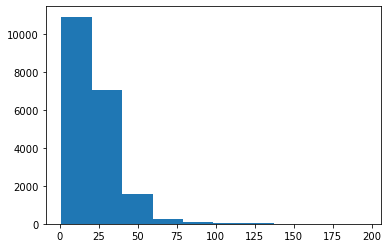

In [20]:
plt.hist(lens)

In [21]:
'num examples: ', sum((min_sent_len<=lens)&(lens<=max_sent_len))

('num examples: ', 12967)

In [22]:
df_filtered = df[(min_sent_len<=lens)&(lens<=max_sent_len)]

filter by tp,fp, etc. wanted distribution

In [23]:
# binary case
if df_filtered.label.max == 1:
    tp = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 1)].sample(125, random_state=42)
    fp = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 1)].sample(125, random_state=42)
    tn = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 0)].sample(125, random_state=42)
    fn = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 0)].sample(125, random_state=42)
    df_final = pd.concat([tp, fp, tn, fn])
else:  # multiclass case
    all_df = []
    for i in range(df_filtered.label.max):
        all_df.append(df_filtered[(df_filtered.label == i) & (df_filtered.preds == i)])
        df_final = pd.concat(all_df)

In [27]:
len(df_final)

10723

In [28]:
df_final.sample().iloc[0].content

'in the past eight years send has renovated over 70 homes for affordable resale to families , created more than 100 high quality apartments , assisted 20 businesses to expand or improve their facilities , created three new parks , and taught more than 200 youth work ethics and skills .'

de-duplicate the dataset

In [29]:
if "content2" in df_final.columns:
    df_final["content3"] = list(zip(df_final.content, df_final.content2))
    df_final.drop_duplicates('content3', inplace=True)
    print(len(df_final) - df_final.content3.nunique())
    df_final.drop('content3', axis=1, inplace=True)

sample statistics

In [34]:
filtered_lens = df_final.content.apply(lambda x: len(x.split()))
print('len mean: ', filtered_lens.mean())
print('len std: ', filtered_lens.std())
print('len median: ', filtered_lens.median())
print('len min: ', filtered_lens.min())
print('len max: ', filtered_lens.max())
print('accuracy: ',(len(tp) + len(tn))/len(df_final))

len mean:  28.48363025837142
len std:  13.25233497135992
len median:  25.0
len min:  15
len max:  141
accuracy:  0.6656095513478221


save sample

In [35]:
df_final.to_csv(out_path, index=False)